# Quantum Volume (QV)

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"
backend = "fakedeneb"

## Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Quantum Volume Configuration

In [4]:
from iqm.benchmarks.quantum_volume.quantum_volume import *

In [5]:
EXAMPLE_QV = QuantumVolumeConfiguration(
    num_circuits=500,
    shots=2**8,
    calset_id=None,
    num_sigmas=2,
    choose_qubits_routine="custom",
    #custom_qubits_array=[[0,1,2,3], [0,1,3,4]],
    custom_qubits_array=[[1,2,3], [1,3,4]],
    qiskit_optim_level=3,
    optimize_sqg=True,
    routing_method="sabre",
    physical_layout="fixed",
    max_gates_per_batch=60_000,
    rem=True,
    mit_shots=1_000,
)

## Run the experiment

In [6]:
benchmark_qv = QuantumVolumeBenchmark(backend, EXAMPLE_QV)
run0_qv = benchmark_qv.run()

2025-02-10 09:32:26,669 - iqm.benchmarks.logging_config - INFO - Executing QV on qubits [1, 2, 3]
2025-02-10 09:32:26,871 - iqm.benchmarks.logging_config - INFO - Successfully generated all 500 circuits to be executed
2025-02-10 09:32:26,872 - iqm.benchmarks.logging_config - INFO - Will transpile according to "fixed" physical layout
2025-02-10 09:32:26,872 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeDenebBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2025-02-10 09:32:36,922 - iqm.benchmarks.logging_config - INFO - Submitting batch with 500 circuits corresponding to qubits [1, 2, 3]
2025-02-10 09:32:36,932 - iqm.benchmarks.logging_config - INFO - max_gates_per_batch restriction: submitting subbatch #1 with 500 circuits corresponding to qubits [1, 2, 3]
2025-02-10 09:32:38,160 - iqm.benchmarks.logging_config - INFO - Job for layout [1, 2, 3] submitted successfully!
2025-02-10 09:32:38,229 - iqm.benchmarks.logging_conf

One can perform a separate run of the benchmark (also possible with a different configuration)

In [ ]:
#run1_qv = benchmark_qv.run()

## Perform Analysis

In [7]:
result0_qv = benchmark_qv.analyze()

2025-02-10 09:33:35,884 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [1, 2, 3]
2025-02-10 09:33:36,909 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [1, 3, 4]
2025-02-10 09:33:37,862 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [1, 2, 3] with 1000 shots
/Users/adrian.auer/Documents/Repositories/iqm-benchmarks/src/iqm/benchmarks/quantum_volume/quantum_volume.py:104: RuntimeWarning: invalid value encountered in scalar power
  c_s = [(c_h[i] * ((1 - c_h[i]) / len(hops[: (i + 1)]))) ** 0.5 for i in range(len(hops))]
/Users/adrian.auer/Documents/Repositories/iqm-benchmarks/src/iqm/benchmarks/quantum_volume/quantum_volume.py:195: RuntimeWarning: invalid value encountered in scalar power
  std = (avg * (1 - avg) / len(heavy_output_probabilities)) ** 0.5
2025-02-10 09:33:37,897 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [1, 3, 4] with 1000 shots

In [8]:
#result1_qv = benchmark.analyze(run_index=0)

List all the keys in the attributes of the dataset

In [9]:
attr_keys = sorted([str(x) for x in list(result0_qv.dataset.attrs.keys())])
for k in attr_keys:
    print(k)

0
1
REM_quasidistributions
backend_configuration_name
backend_name
benchmark
calset_id
choose_qubits_routine
custom_qubits_array
execution_timestamp
max_gates_per_batch
mit_shots
num_circuits
num_sigmas
optimize_sqg
physical_layout
qiskit_optim_level
rem
routing_method
session_timestamp
shots


The data for specific experiments is indexed by 0,1,..., e.g., for the first experiment:

In [10]:
for k in result0_qv.dataset.attrs[0].keys():
    print(k)

qubits
qv_results_type
time_circuit_generation
time_transpilation
time_batching
time_submit
time_retrieve
all_job_metadata
operation_counts
cumulative_average_heavy_output_probability
cumulative_stddev_heavy_output_probability
heavy_output_probabilities
REM_cumulative_average_heavy_output_probability
REM_cumulative_stddev_heavy_output_probability
REM_heavy_output_probabilities


In [11]:
result0_qv.dataset.attrs[0]["heavy_output_probabilities"]

[0.18359375,
 0.0078125,
 0.19140625,
 0.0078125,
 0.3046875,
 0.40234375,
 0.0,
 0.2265625,
 0.3671875,
 0.27734375,
 0.40234375,
 0.5234375,
 0.57421875,
 0.234375,
 0.7421875,
 0.63671875,
 0.76953125,
 0.44140625,
 0.1875,
 0.4921875,
 0.18359375,
 0.296875,
 0.29296875,
 0.55078125,
 0.73046875,
 0.30078125,
 0.60546875,
 0.359375,
 0.62109375,
 0.8046875,
 0.2578125,
 0.2421875,
 0.00390625,
 0.44921875,
 0.69140625,
 0.0,
 0.30078125,
 0.1640625,
 0.3515625,
 0.21484375,
 0.0078125,
 0.453125,
 0.42578125,
 0.20703125,
 0.59765625,
 0.62890625,
 0.328125,
 0.265625,
 0.32421875,
 0.3046875,
 0.1796875,
 0.5625,
 0.7265625,
 0.38671875,
 0.0078125,
 0.69140625,
 0.375,
 0.53125,
 0.58203125,
 0.1796875,
 0.55078125,
 0.4140625,
 0.37109375,
 0.48046875,
 0.53125,
 0.2578125,
 0.58203125,
 0.42578125,
 0.66796875,
 0.34375,
 0.68359375,
 0.140625,
 0.484375,
 0.21484375,
 0.0078125,
 0.4296875,
 0.21484375,
 0.4453125,
 0.4375,
 0.57421875,
 0.2734375,
 0.25390625,
 0.28125,
 0.19

The observation object contains the benchmark results

In [12]:
result0_qv.observations

[BenchmarkObservation(name='average_heavy_output_probability', value=0.372171875, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 3]), uncertainty=0.02161758406755872),
 BenchmarkObservation(name='is_succesful', value=False, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 3]), uncertainty=None),
 BenchmarkObservation(name='QV_result', value=1, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 3]), uncertainty=None),
 BenchmarkObservation(name='average_heavy_output_probability', value=0.387859375, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 3, 4]), uncertainty=0.021791029357265772),
 BenchmarkObservation(name='is_succesful', value=False, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 3, 4]), uncertainty=None),
 BenchmarkObservation(name='QV_result', value=1, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 3, 4]), uncertainty=None),
 BenchmarkObservation(name='REM_average_heavy_output_probability', value=

## Generate plots

In [13]:
for k in result0_qv.plots.keys():
    print(k)

vanilla_3_qubits_[1, 2, 3]
vanilla_3_qubits_[1, 3, 4]
vanilla_REM_3_qubits_[1, 2, 3]
vanilla_REM_3_qubits_[1, 3, 4]


Print a specific output

In [14]:
# result0_qv.plots["vanilla_4_qubits_[0, 1, 3, 4]"]

Or print all the plots at once

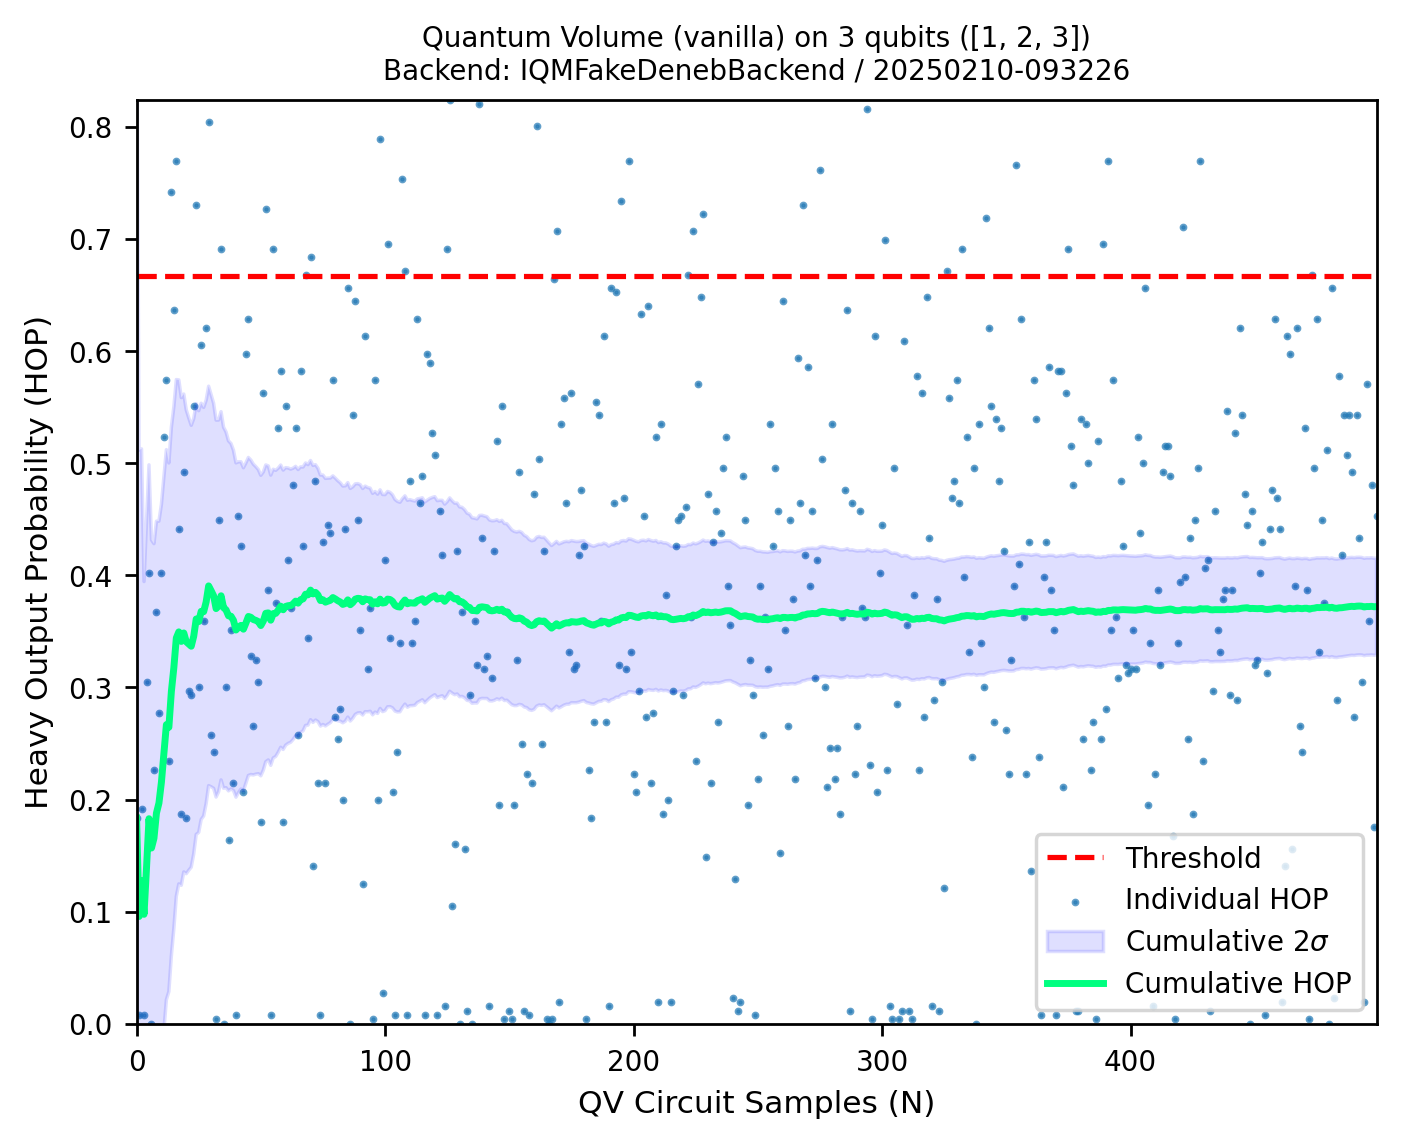

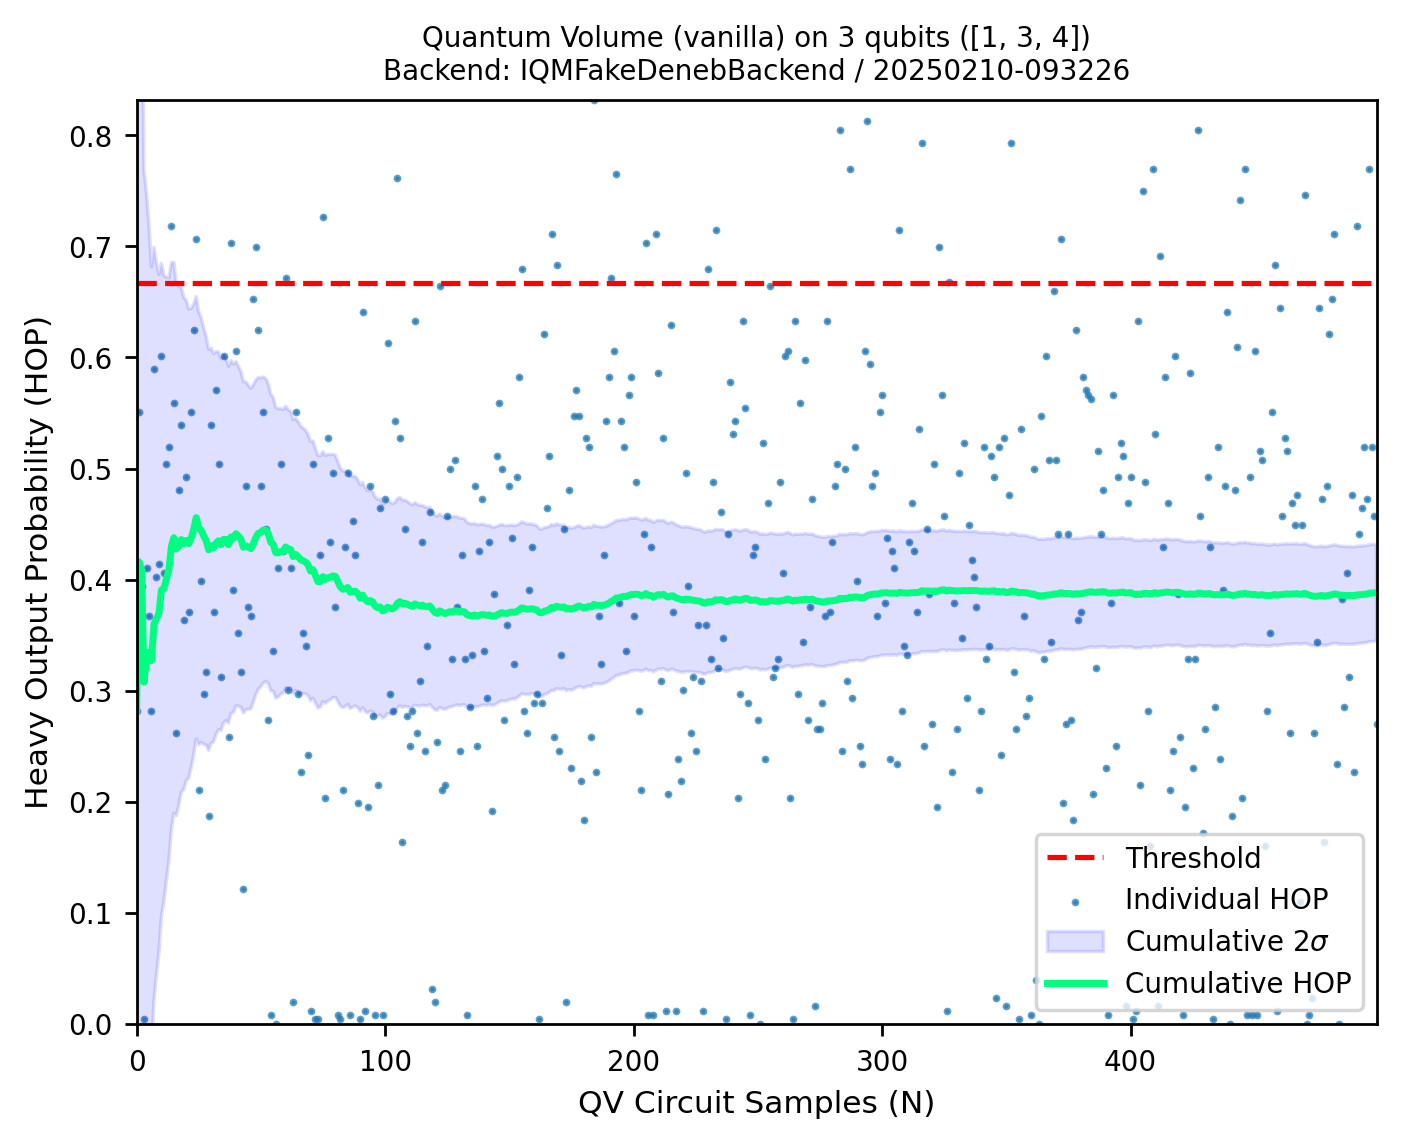

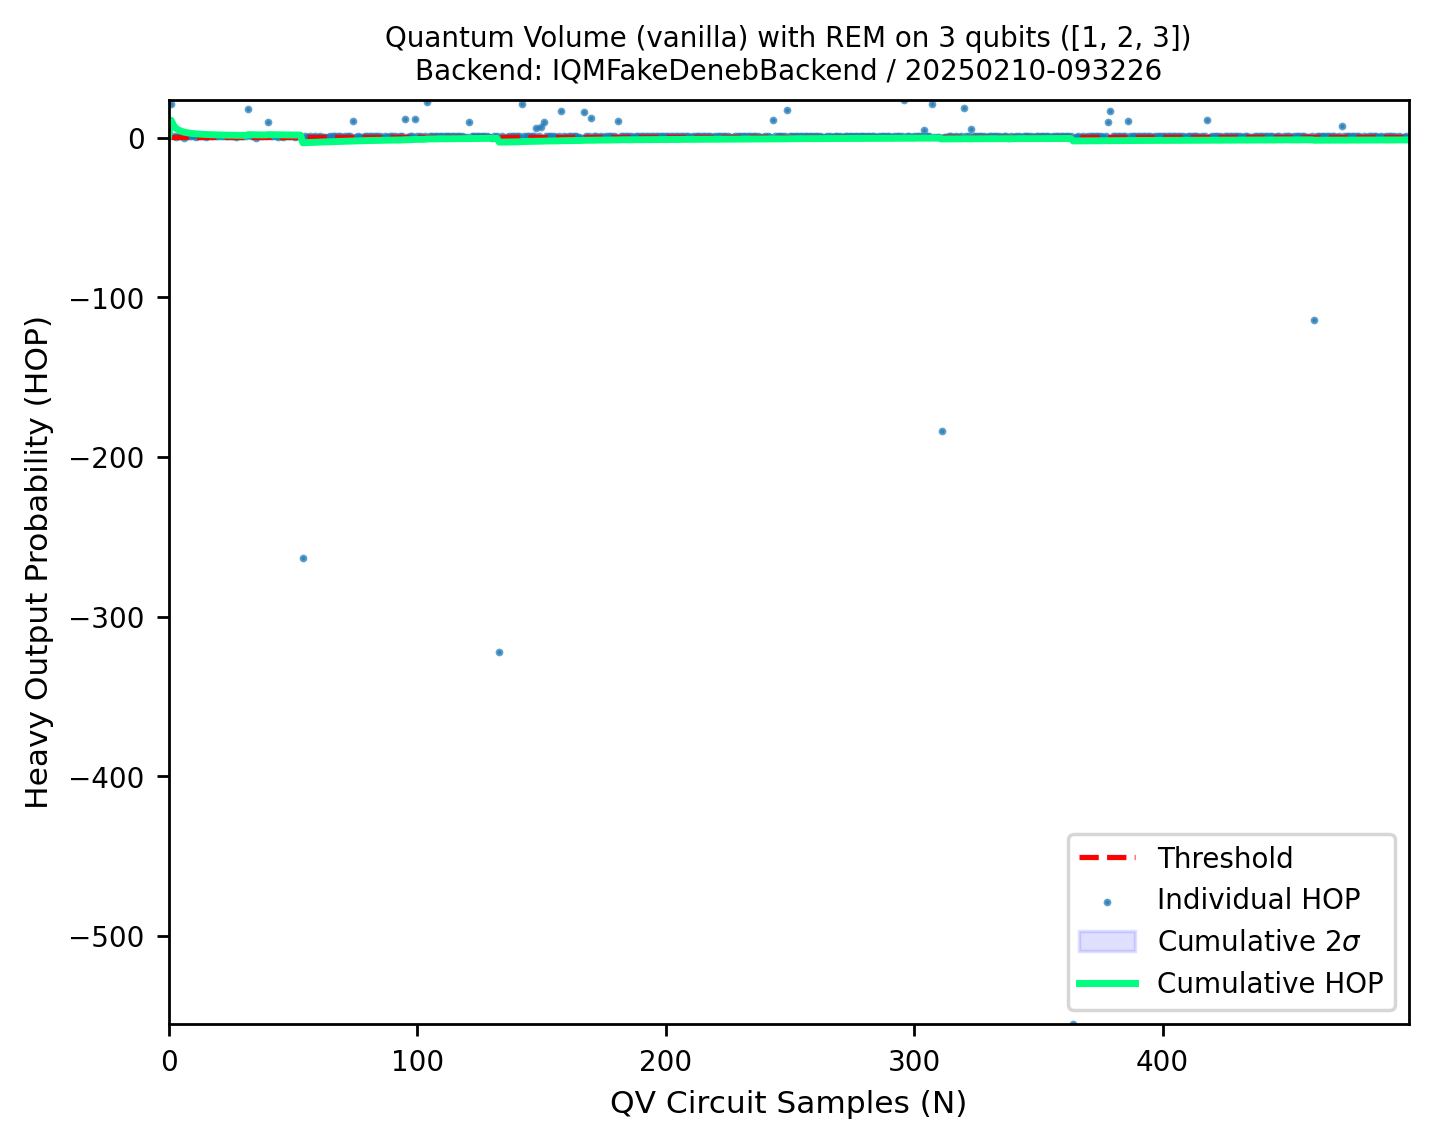

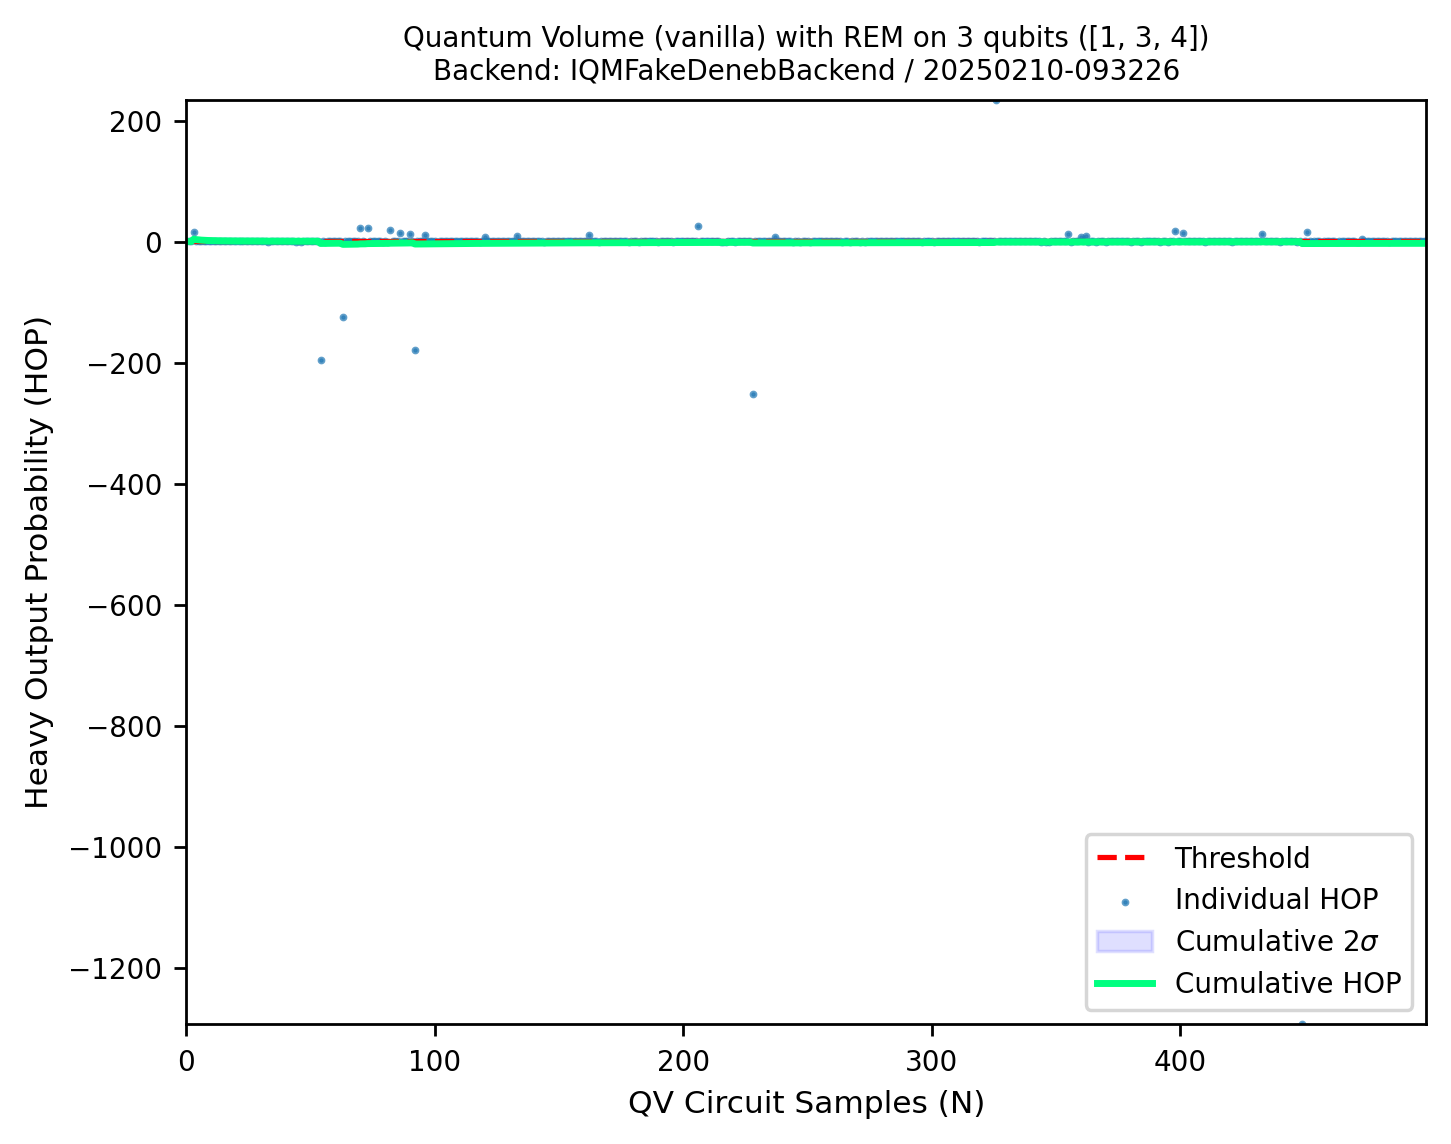

In [15]:
result0_qv.plot_all()